# 08 - Artifical neural networks

The goal of this exercise is to develop an understanding how to implement a simple Artificial neural network using keras and tensorflow.

<div class="alert alert-block alert-info">
To solve this notebook you need the knowledge from the previous notebook. If you have problems solving it, take another look at the last week's notebooks.
    
It's also recommended to read the chapter 10 of the book in advance.
</div>

**Task**: In this exercise, we use a dataset that we have already used in previous exercises to predict heart attacks in patients.

In [1]:
# Run this cell two import the following modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

<h2 style="color:blue" align="left">Load and preprocess the data</h2>

First of all, we need to load the dataset.

In [2]:
dataset = pd.read_csv('dataset/heart.dat', delim_whitespace=True)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


<h2 style="color:blue" align="left">Data preprocessing</h2>

Now, we can seperate the features and the target values.

In [3]:
X = dataset.drop('target', axis=1)
y = dataset['target'].replace([1,2],[0,1])

Scaling input and output variables is a critical step in using neural network models.

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use the StandardScaler to scale the whole data set. Save the results in the Variable X_scaled.
</div>

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = []
# Write Your Code Here
X_scaled = sc.fit_transform(X)

We can see that the data set is unbalanced.

In [5]:
y.value_counts(normalize=True)

0    0.555556
1    0.444444
Name: target, dtype: float64

In the next step, we need to perform the train-test-split. Because of the unblanace data set, we have to perform a stratified train-test-split.

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use the train_test_split method to perform a stratified train-test split. The ratio between train and test should be 80/20. To get comparable results, please set the random_state option to 42.
</div>

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = [], [], [], []
# Write Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

<div class="alert alert-block alert-warning"> <b>Warning</b><br> 
If we use neural networks, it is typical to use a validation set in addition to the train and test set. The validation set is used for the model selection as well as for the evaluation of the hyperparameter tuning. The test set is used at the very end for the evaluation of the generalization of the model. Since there are only 270 data points available, we will also validate on the test set, which should be avoided.
</div>

<h2 style="color:blue" align="left">Build a Model</h2>

After we've preprocessed the data for the ANN, we can create your model.

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use the Sequential API of keras to create a fully-connected deep neural network.
</div>

*Hints:*
- Use `keras.layers.Flatten` layer as input layer
- The input size must correspond to the number of features
- Use `keras.layers.Dense` layer with ReLu activiation function as hidden layer
- Output layer should be a dense layer with only one neuron
- Choose the right activation function for the outplut layer for a binary classification problem
- Good results can be achived with four hidden layer and <8000 total parameters

In [7]:
X_train.shape

(216, 13)

In [8]:
model = keras.models.Sequential()
# Write Your Code Here
model.add(keras.layers.Flatten(input_shape=[13]))
model.add(keras.layers.Dense(250, activation='relu'))
model.add(keras.layers.Dense(180, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 13)                0         
                                                                 
 dense (Dense)               (None, 250)               3500      
                                                                 
 dense_1 (Dense)             (None, 180)               45180     
                                                                 
 dense_2 (Dense)             (None, 1)                 181       
                                                                 
Total params: 48,861
Trainable params: 48,861
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

After the creation of the model, it must be compiled.

<div class="alert alert-block alert-success"><b>Task</b><br> 
Compile your model using model.compile(). We want to use the already created Stochastic Gradient Descent optimizer. Choose the right loss and metrics. 
</div>


In [10]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
# Write Your Code Here
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

We now just test, if the definition works. 

<div class="alert alert-block alert-success"><b>Task</b><br> 
Fit the model to the training data and validate it with the test data. Start with a few epochs. 
</div>

In [11]:
# Write Your Code Here
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_test, y_test)
)

keras.backend.clear_session()

Epoch 1/30
7/7 [==============================] - 0s 22ms/step - loss: 6.1699 - accuracy: 0.5185 - val_loss: 5.7997 - val_accuracy: 0.4259
Epoch 2/30
7/7 [==============================] - 0s 5ms/step - loss: 5.5605 - accuracy: 0.3889 - val_loss: 3.7101 - val_accuracy: 0.4259
Epoch 3/30
7/7 [==============================] - 0s 4ms/step - loss: 4.2210 - accuracy: 0.3935 - val_loss: 3.3645 - val_accuracy: 0.4444
Epoch 4/30
7/7 [==============================] - 0s 5ms/step - loss: 3.3452 - accuracy: 0.4352 - val_loss: 3.0811 - val_accuracy: 0.4815
Epoch 5/30
7/7 [==============================] - 0s 5ms/step - loss: 3.1363 - accuracy: 0.4769 - val_loss: 3.0263 - val_accuracy: 0.5185
Epoch 6/30
7/7 [==============================] - 0s 4ms/step - loss: 2.9698 - accuracy: 0.4815 - val_loss: 2.9884 - val_accuracy: 0.5556
Epoch 7/30
7/7 [==============================] - 0s 5ms/step - loss: 2.8544 - accuracy: 0.5093 - val_loss: 2.9678 - val_accuracy: 0.5741
Epoch 8/30
7/7 [=================

The last step is to start the training. 

<div class="alert alert-block alert-success"><b>Task</b><br> 
Create a early stopping callback using the pre-defined class keras.callbacks.EarlyStopping. The number of epochs with no improvement after which training will be stopped should be set to 3. Save the callback in the variable early_stopping_cb.
</div>


In [12]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model_until_here.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

Now the model is trained and validated on the test set. To vizualize the results your can use the history variable.

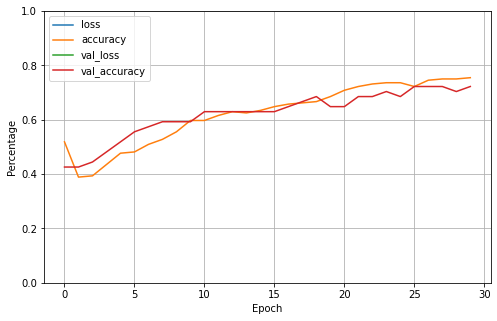

In [13]:
ax = pd.DataFrame(history.history).plot(figsize=(8, 5))
ax.grid(True)
ax.set_ylim(0, 1)
ax.set_ylabel('Percentage')
ax.set_xlabel('Epoch');

<h2 style="color:blue" align="left">Making predictions</h2>

The trained model can now be used to predict some values. For evaluation, we use the data points of the test set for classification.

In [14]:
y_pred_output = model.predict(X_test)
y_pred_output[:5]

2/2 [==============================] - 0s 1ms/step


array([[ 0.23760651],
       [-0.13766038],
       [-0.05463292],
       [ 1.756348  ],
       [ 0.10723369]], dtype=float32)

The data type of the output depends on the chosen activation function of the last layer in the model. For the evaulation we need a binary value classification result for each data point.

<div class="alert alert-block alert-success"><b>Task</b><br> 
Find a way to transform the output of your model into a binary array with the classification results. Save the results in the variable y_pred.
</div>

In [15]:
y_pred_output[y_pred_output < 0.5] = 0
y_pred_output[y_pred_output >= 0.5] = 1
y_pred_output[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

Your can use the following code for evaluation.

Recall Score: 0.7916666666666666
Precision Score: 0.6551724137931034


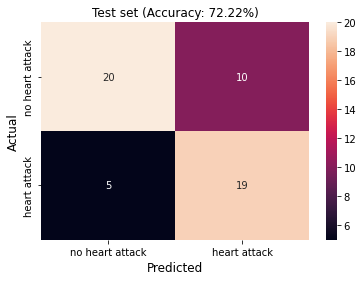

In [17]:
class_names=['no heart attack', 'heart attack']
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_output)
ax = sns.heatmap(confusion_matrix(y_test, y_pred_output), annot=True, fmt="d", yticklabels=class_names, xticklabels=class_names)
ax.set_title(f'Test set (Accuracy: {round(test_accuracy*100, 2)}%)')
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_yticklabels(class_names, va='center')
print('Recall Score:', recall_score(y_test, y_pred_output))
print('Precision Score:', precision_score(y_test, y_pred_output))

## Notes
- Neuron count (200, 100) -> 11 falses in total
- Neuron count (20, 12) -> 9 falses in total (overfitting?)